In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("/content/housing.csv")

In [3]:
data.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5472,-118.45,33.99,52.0,1010.0,244.0,573.0,242.0,4.1861,363200.0,<1H OCEAN
8951,-118.37,34.03,39.0,213.0,44.0,138.0,52.0,2.1250,196400.0,<1H OCEAN
6250,-117.98,34.04,34.0,2547.0,537.0,2108.0,498.0,3.4722,154600.0,<1H OCEAN
2526,-122.19,39.53,34.0,2679.0,533.0,1287.0,505.0,2.1650,58700.0,INLAND
708,-122.07,37.68,36.0,1815.0,426.0,1280.0,431.0,3.2500,218100.0,NEAR BAY
19409,-120.92,37.70,24.0,527.0,112.0,270.0,112.0,1.6172,156300.0,INLAND
8247,-118.19,33.78,29.0,1013.0,392.0,1083.0,316.0,1.8438,162500.0,NEAR OCEAN
6531,-118.07,34.07,31.0,1370.0,284.0,1062.0,277.0,3.5156,199300.0,<1H OCEAN
9994,-121.05,39.13,10.0,3063.0,497.0,1168.0,507.0,4.4375,185100.0,INLAND
17721,-121.79,37.33,13.0,2978.0,505.0,1794.0,485.0,6.6813,277800.0,<1H OCEAN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.describe().round(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


In [6]:
data.duplicated().sum()

0

In [7]:
data.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [8]:
data.total_bedrooms.value_counts()

,count
total_bedrooms,
280.0,55
331.0,51
345.0,50
343.0,49
393.0,49
...,...
2961.0,1
1915.0,1
1215.0,1


In [9]:
data.total_bedrooms.value_counts().iloc[:10]

,count
total_bedrooms,
280.0,55
331.0,51
345.0,50
343.0,49
393.0,49
328.0,48
348.0,48
394.0,48
272.0,47


In [10]:
data.total_bedrooms.median()

435.0

In [11]:
data.total_bedrooms.fillna(data.total_bedrooms.median(), inplace=True)

<ipython-input-11-e55396a6ddbc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.total_bedrooms.fillna(data.total_bedrooms.median(), inplace=True)


In [12]:
data.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [13]:
data.ocean_proximity.value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


<Axes: xlabel='ocean_proximity', ylabel='Count'>

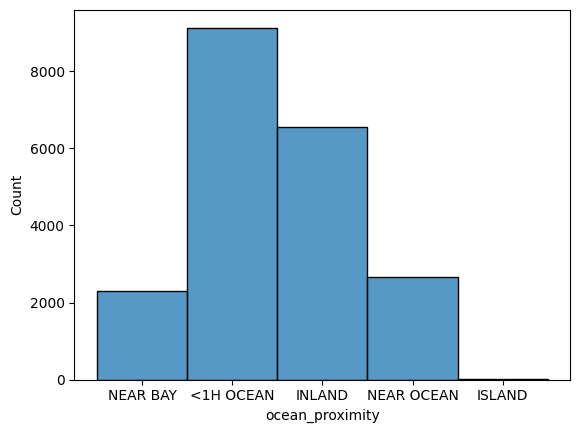

In [14]:
sns.histplot(data.ocean_proximity)

In [15]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [16]:
data.ocean_proximity.replace({'<1H OCEAN':0, 'INLAND':1, 'NEAR OCEAN':2,'NEAR BAY':3, 'ISLAND':4},inplace = True)

<ipython-input-16-f520fd910d20>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.ocean_proximity.replace({'<1H OCEAN':0, 'INLAND':1, 'NEAR OCEAN':2,'NEAR BAY':3, 'ISLAND':4},inplace = True)
<ipython-input-16-f520fd910d20>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.ocean_proximity.rep

In [17]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


In [18]:
data[['total_rooms','total_bedrooms']].value_counts()

total_rooms  total_bedrooms
1440.0       267.0             3
40.0         10.0              3
1387.0       236.0             3
1864.0       331.0             3
102.0        17.0              3
                              ..
1678.0       606.0             1
             514.0             1
             386.0             1
             369.0             1
39320.0      6210.0            1
Name: count, Length: 20460, dtype: int64

In [19]:
data[['longitude','latitude','median_house_value','ocean_proximity']].value_counts().sort_values(ascending = False)

longitude  latitude  median_house_value  ocean_proximity
-122.44    37.80     500001.0            3                  9
           37.79     500001.0            3                  8
-122.43    37.79     500001.0            3                  7
-122.42    37.80     500001.0            3                  7
-122.41    37.80     500001.0            3                  6
                                                           ..
-116.41    33.74     168800.0            1                  1
                     177800.0            1                  1
-116.40    33.78     259200.0            1                  1
           34.09     97800.0             1                  1
-114.31    34.19     66900.0             1                  1
Name: count, Length: 20315, dtype: int64

In [20]:
data[['total_rooms','total_bedrooms','housing_median_age']].value_counts().sort_values(ascending = False)

,,,count
total_rooms,total_bedrooms,housing_median_age,
2264.0,439.0,52.0,2
24.0,6.0,52.0,2
48.0,8.0,26.0,2
2205.0,453.0,33.0,2
1511.0,274.0,35.0,2
...,...,...,...
32627.0,6445.0,11.0,1
37937.0,5471.0,4.0,1
27870.0,5027.0,5.0,1


<Axes: >

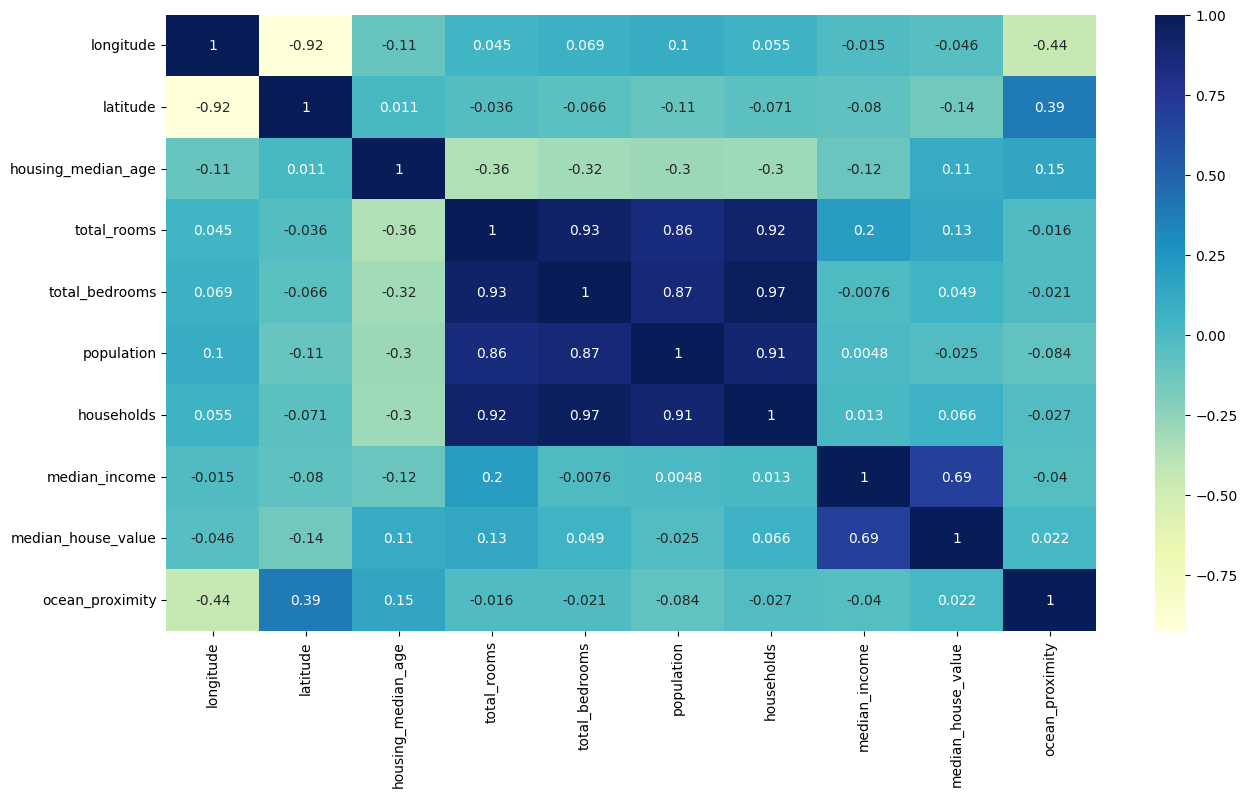

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [24]:
X_data = data.drop(['median_house_value'], axis=1)
y_label = data['median_house_value']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_label, test_size=0.2, random_state=42)

In [26]:
def RegressionModel(model):
  model.fit(X_train, y_train)
  train_data_accuracy = model.score(X_train, y_train)
  test_data_accuracy = model.score(X_test, y_test)
  print('Accuracy score on training data = ', train_data_accuracy)
  print('Accuracy score on test data = ', test_data_accuracy)

In [27]:
model = LinearRegression()
RegressionModel(model)

Accuracy score on training data =  0.640334144695327
Accuracy score on test data =  0.6133745270468198


In [29]:
model = RandomForestRegressor()
RegressionModel(model)

Accuracy score on training data =  0.9744597305578486
Accuracy score on test data =  0.810104234847063


In [30]:
model = GradientBoostingRegressor()
RegressionModel(model)

Accuracy score on training data =  0.7896150670979764
Accuracy score on test data =  0.7604261904408444
